# Importing libraries

In [30]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision import transforms
import matplotlib.pyplot as plt
import tqdm

# Device configuration

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Loading Dataset

In [3]:
# Load MNIST dataset
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:19<00:00, 512944.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24511471.84it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:13<00:00, 125485.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2930399.75it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



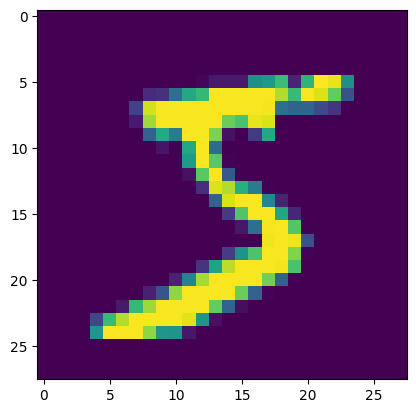

In [4]:
# Plot the first image in the training dataset
plt.imshow(train_dataset.data[0])

# Create Data Loaders for the Train and Test Datasets

In [5]:
#Define batch size
batch_size = 32

# Data Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Hyperparameters

In [16]:
# Insantiating Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
EPOCH = 10

# Logistic Regression Model

In [17]:
model = nn.Linear(input_size, num_classes).to(device)

# Loss and optimizer

In [18]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training and Testing the model

In [38]:
# Creating lists to keep track of loss and accuracy
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

def train():
    #Train the model
    train_count = 0
    train_correct = 0
    total_train_loss = 0

    for images, labels in tqdm.tqdm(train_loader, desc="Training"):
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_train_loss += cost.item()

        # Backward and optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # Track train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_count += bs
        train_correct += (predicted == labels).sum().item()

    cur_loss = total_train_loss/len(train_loader)
    train_accuracy.append(train_correct/train_count)
    train_loss.append(cur_loss)

    print( f"Loss = {cur_loss:.4f}, Train Accuracy = {train_accuracy[-1]*100}")

def test():
    # Test the model
    test_count = 0
    test_correct = 0
    total_test_loss = 0

    model.eval()
    for images, labels in tqdm.tqdm(test_loader, desc="Testing"):
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_test_loss += cost.item()

        # Track test accuracy
        _, predicted = torch.max(outputs.data, 1)
        test_count += bs
        test_correct += (predicted == labels).sum().item()

    test_accuracy.append(test_correct/test_count)
    cur_loss = total_test_loss/len(test_loader)
    test_loss.append(cur_loss)

    print(f"Loss = {cur_loss}, Test Accuracy = {test_accuracy[-1]*100}")

for epoch in range(EPOCH):
    print(f"Epoch {epoch+1} of {EPOCH}")
    train()
    test()



Epoch 1 of 10


Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Training: 100%|██████████| 1875/1875 [00:04<00:00, 451.10it/s]


Loss = 0.2331, Train Accuracy = 93.54166666666667


Testing: 100%|██████████| 313/313 [00:00<00:00, 540.18it/s]


Loss = 0.2775983095686799, Test Accuracy = 92.75
Epoch 2 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 459.55it/s]


Loss = 0.2326, Train Accuracy = 93.55166666666666


Testing: 100%|██████████| 313/313 [00:00<00:00, 556.87it/s]


Loss = 0.2751175257549904, Test Accuracy = 92.65
Epoch 3 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 465.16it/s]


Loss = 0.2323, Train Accuracy = 93.55499999999999


Testing: 100%|██████████| 313/313 [00:00<00:00, 553.61it/s]


Loss = 0.2791450021479029, Test Accuracy = 92.7
Epoch 4 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 445.16it/s]


Loss = 0.2319, Train Accuracy = 93.57333333333332


Testing: 100%|██████████| 313/313 [00:00<00:00, 507.13it/s]


Loss = 0.2758824981231326, Test Accuracy = 92.71000000000001
Epoch 5 of 10


Training: 100%|██████████| 1875/1875 [00:03<00:00, 469.21it/s]


Loss = 0.2317, Train Accuracy = 93.62833333333333


Testing: 100%|██████████| 313/313 [00:00<00:00, 548.75it/s]


Loss = 0.27941517277915306, Test Accuracy = 92.85
Epoch 6 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 468.12it/s]


Loss = 0.2311, Train Accuracy = 93.63333333333334


Testing: 100%|██████████| 313/313 [00:00<00:00, 548.52it/s]


Loss = 0.27796119264216895, Test Accuracy = 92.56
Epoch 7 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 449.65it/s]


Loss = 0.2310, Train Accuracy = 93.56333333333333


Testing: 100%|██████████| 313/313 [00:00<00:00, 530.74it/s]


Loss = 0.2839843634405908, Test Accuracy = 92.53
Epoch 8 of 10


Training: 100%|██████████| 1875/1875 [00:03<00:00, 473.69it/s]


Loss = 0.2309, Train Accuracy = 93.62


Testing: 100%|██████████| 313/313 [00:00<00:00, 553.73it/s]


Loss = 0.2776732316579872, Test Accuracy = 92.74
Epoch 9 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 457.93it/s]


Loss = 0.2303, Train Accuracy = 93.60666666666667


Testing: 100%|██████████| 313/313 [00:00<00:00, 536.26it/s]


Loss = 0.28164645587912385, Test Accuracy = 92.73
Epoch 10 of 10


Training: 100%|██████████| 1875/1875 [00:04<00:00, 438.55it/s]


Loss = 0.2304, Train Accuracy = 93.65


Testing: 100%|██████████| 313/313 [00:00<00:00, 557.80it/s]

Loss = 0.27928139096625837, Test Accuracy = 92.54


# Plotting Loss and Accuracy

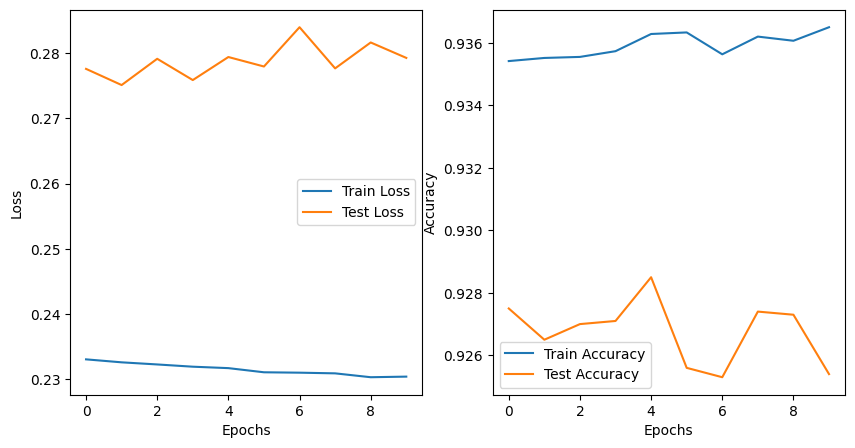

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the First 16 Images with their Predictions

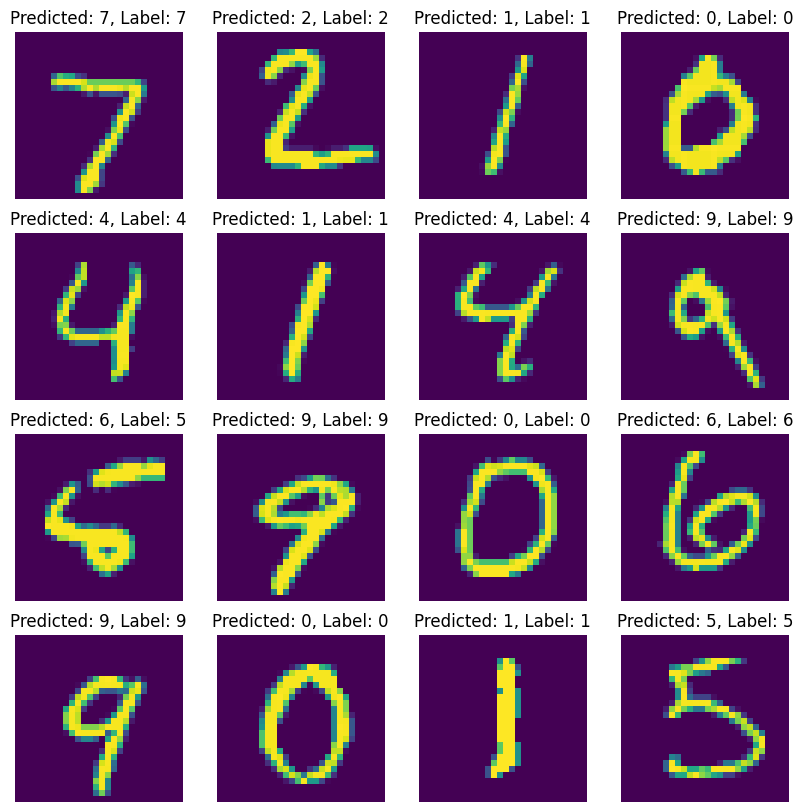

In [40]:
plt.figure(figsize=(10, 10))

model.eval()
with torch.no_grad():
    for i in range(16):
        plt.subplot(4, 4, i+1)
        image, label = test_dataset[i]
        image = image.reshape(-1, 28*28).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        plt.imshow(image.cpu().reshape(28, 28))
        plt.title(f'Predicted: {predicted.item()}, Label: {label}')
        plt.axis('off')
plt.show()